In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [19]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X

array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

In [8]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
#model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50
25/25 [==============================] - 0s 14ms/step - loss: 0.0882 - accuracy: 0.9675 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0863 - accuracy: 0.9700 - val_loss: 0.0647 - val_accuracy: 0.9800
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0863 - accuracy: 0.9688 - val_loss: 0.0624 - val_accuracy: 0.9800
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0861 - accuracy: 0.9663 - val_loss: 0.0657 - val_accuracy: 0.9750
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.9675 - val_loss: 0.0627 - val_accuracy: 0.9800
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0844 - accuracy: 0.9700 - val_loss: 0.0621 - val_accuracy: 0.9750
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0829 - accuracy: 0.9688 - val_loss: 0.0608 - val_accuracy: 0.9850
Epoch 8/50
25/25 

In [17]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(X_grid).reshape(xx.shape)

313/313 [==============================] - 1s 2ms/step


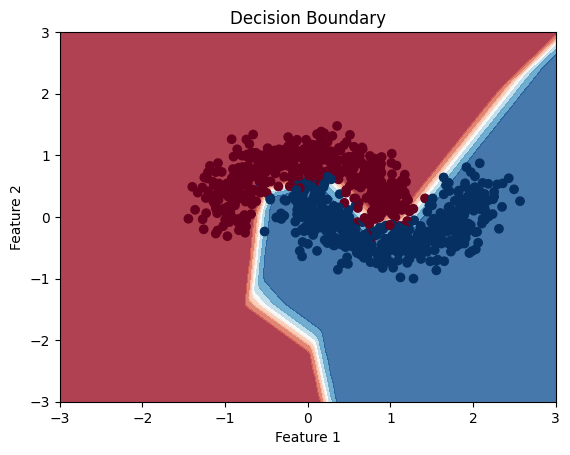

In [18]:
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()